In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

### loading data
_____________________________________________________________________________________________________________________

In [2]:
(x_train,y_train),(x_test, y_test) = datasets.mnist.load_data()

In [60]:
x_train.shape, y_train.shape, x_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28))

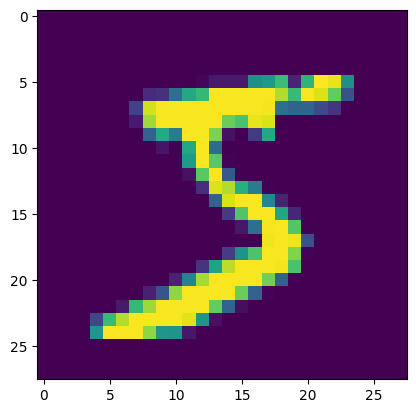

In [5]:
plt.imshow(x_train[0])

In [67]:
x_train[0].shape

(28, 28)

In [76]:
x_train_reshaped = x_train.reshape(-1, 28, 28,1)
x_train_reshaped.shape

(60000, 28, 28, 1)

In [77]:
x_test_reshaped = x_test.reshape(-1, 28, 28,1)
x_test_reshaped.shape

(10000, 28, 28, 1)

In [78]:
x_train[0].shape

(28, 28)

In [79]:
y_train[:8]

array([5, 0, 4, 1, 9, 2, 1, 3], dtype=uint8)

In [80]:
# scale the images
x_train_reshaped = x_train_reshaped/255
x_test_reshaped = x_test_reshaped /255

### model building
_________________________________

In [117]:
CNN = models.Sequential([
    #layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    layers.Conv2D(filters = 32, kernel_size=(3,3), activation= "relu", input_shape = (28, 28,1)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(filters = 32, kernel_size=(3,3), activation= "relu"),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(filters = 64, kernel_size=(3,3), activation= "relu"),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(30, activation= "relu"),
    layers.Dense(10, activation= "softmax"),
])

In [118]:
CNN.compile( optimizer = "adam",
            loss = "sparse_categorical_crossentropy",
            metrics = ["accuracy"]
)

In [119]:
CNN.fit(x_train_reshaped, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 29s 15ms/step - loss: 1.1195 - accuracy: 0.6155
Epoch 2/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3908 - accuracy: 0.8825
Epoch 3/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2848 - accuracy: 0.9143
Epoch 4/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2380 - accuracy: 0.9285
Epoch 5/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2087 - accuracy: 0.9371


In [98]:
CNN.evaluate(x_test_reshaped, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1328 - accuracy: 0.9578


[0.1327843815088272, 0.9577999711036682]

In [106]:
y_pred = CNN.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [ ]:
y_prediction = [np.argmax(element) for element in y_pred]
y_prediction

In [109]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_prediction))


              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.85      1.00      0.92      1135
           2       0.95      0.93      0.94      1032
           3       0.85      0.96      0.90      1010
           4       0.92      0.96      0.94       982
           5       0.92      0.95      0.93       892
           6       0.98      0.94      0.96       958
           7       0.69      0.97      0.81      1028
           8       0.99      0.54      0.70       974
           9       0.97      0.66      0.78      1009

    accuracy                           0.89     10000
   macro avg       0.91      0.89      0.88     10000
weighted avg       0.90      0.89      0.88     10000



Text(0.5, 1.0, 'confusion_matrix')

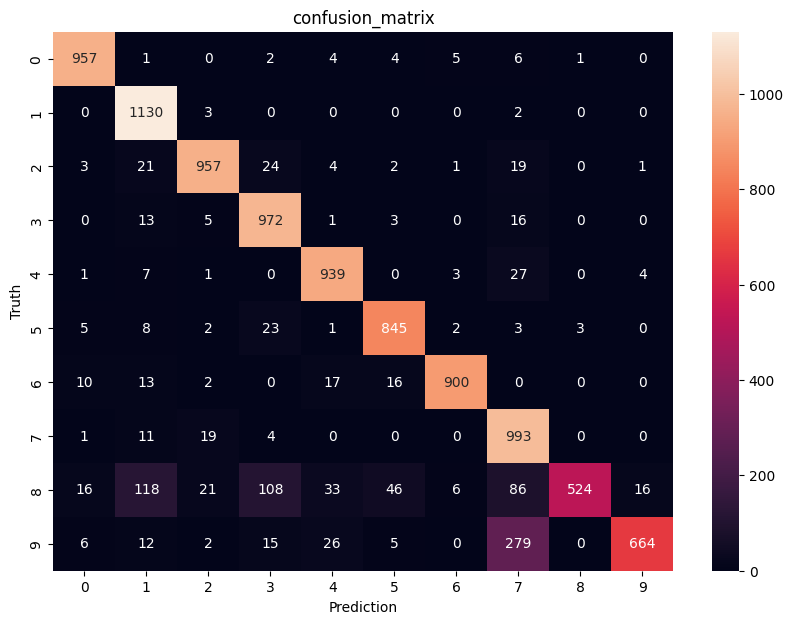

In [113]:
import seaborn as sn
plt.figure(figsize = (10,7))
cm = confusion_matrix(y_test, y_prediction)
sn.heatmap(cm, annot= True, fmt= 'd')
plt.xlabel("Prediction")
plt.ylabel("Truth")
plt.title("confusion_matrix")